# Xarxa neuronal

In [1]:
import pandas as pd
import numpy as np
from pandas import datetime
from matplotlib import pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from keras.optimizers import SGD
from sklearn.model_selection import StratifiedKFold
from scipy.stats import uniform as sp_rand
from scipy.stats import randint
from time import time
from sklearn import preprocessing

Using TensorFlow backend.


## Consum diari total multivariate one-step

In [4]:
daily=pd.read_csv('C:/Users/Laura/Desktop/Smart meters London/workspace R/Dades netes/Final/daily_agr_mitjanaLlarPerDia.csv')
daily.head(5)

,date,apparentTemperatureMax,sunsetTimeHour,weekday,season,cloudCover,humidity,visibility,month,energy_sum
0,2013-01-16,-0.15,16,3,winter,0.48,0.91,4.12,1,13.147536
1,2013-01-20,-0.46,16,7,winter,0.85,0.91,5.10,1,15.021900
2,2013-01-10,2.36,16,4,winter,0.70,0.94,5.21,1,12.066789
3,2013-01-06,6.98,16,7,winter,0.67,0.96,5.50,1,12.422263
4,2012-01-31,1.13,16,2,winter,0.55,0.84,5.62,1,13.890518


In [5]:
#Ens quedem amb date i energy_sum, ordenem valors per data i resetejem index
daily_dia=daily[['date','energy_sum','apparentTemperatureMax','humidity']].sort_values(by=['date']).reset_index()
daily_dia.head(5)


,index,date,energy_sum,apparentTemperatureMax,humidity
0,677,2011-11-23,6.952692,10.36,0.93
1,691,2011-11-24,8.536480,12.93,0.89
2,713,2011-11-25,9.499781,13.03,0.79
3,728,2011-11-26,10.267707,12.96,0.81
4,729,2011-11-27,10.850805,13.54,0.72


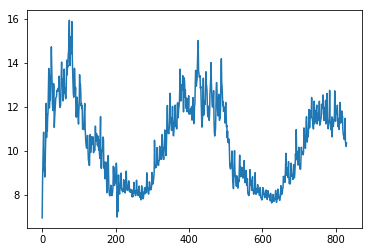

In [16]:
plt.plot(daily_dia )

In [6]:

daily_dia['y+1']=daily_dia['energy_sum'].shift(-1)
daily_dia['y+2']=daily_dia['energy_sum'].shift(-2)
daily_dia['y+3']=daily_dia['energy_sum'].shift(-3)
daily_dia['y+4']=daily_dia['energy_sum'].shift(-4)
daily_dia['y+5']=daily_dia['energy_sum'].shift(-5)
daily_dia['y+6']=daily_dia['energy_sum'].shift(-6)
daily_dia['y+7']=daily_dia['energy_sum'].shift(-7)
daily_dia['y+8']=daily_dia['energy_sum'].shift(-8)
daily_dia['y+9']=daily_dia['energy_sum'].shift(-9)
daily_dia['y+10']=daily_dia['energy_sum'].shift(-10)
daily_dia['y+11']=daily_dia['energy_sum'].shift(-11)
daily_dia['y+12']=daily_dia['energy_sum'].shift(-12)
daily_dia['y+13']=daily_dia['energy_sum'].shift(-13)
daily_dia['y+14']=daily_dia['energy_sum'].shift(-14)
daily_dia['y+15']=daily_dia['energy_sum'].shift(-15)
daily_dia['y+16']=daily_dia['energy_sum'].shift(-16)
daily_dia['y+17']=daily_dia['energy_sum'].shift(-17)
daily_dia['y+18']=daily_dia['energy_sum'].shift(-18)
daily_dia['y+19']=daily_dia['energy_sum'].shift(-19)
daily_dia['y+20']=daily_dia['energy_sum'].shift(-20)
daily_dia['y+21']=daily_dia['energy_sum'].shift(-21)
daily_dia['y+22']=daily_dia['energy_sum'].shift(-22)
daily_dia['y+23']=daily_dia['energy_sum'].shift(-23)
daily_dia['y+24']=daily_dia['energy_sum'].shift(-24)
daily_dia['y+25']=daily_dia['energy_sum'].shift(-25)
daily_dia['y+26']=daily_dia['energy_sum'].shift(-26)
daily_dia['y+27']=daily_dia['energy_sum'].shift(-27)
daily_dia['y+28']=daily_dia['energy_sum'].shift(-28)
daily_dia['y+29']=daily_dia['energy_sum'].shift(-29)
daily_dia['y+30']=daily_dia['energy_sum'].shift(-30)
daily_dia['y+31']=daily_dia['energy_sum'].shift(-31)
daily_dia['y+32']=daily_dia['energy_sum'].shift(-32)
daily_dia['y+33']=daily_dia['energy_sum'].shift(-33)
daily_dia['y+34']=daily_dia['energy_sum'].shift(-34)
daily_dia['y+35']=daily_dia['energy_sum'].shift(-35)
daily_dia['y+36']=daily_dia['energy_sum'].shift(-36)
daily_dia['y+37']=daily_dia['energy_sum'].shift(-37)
daily_dia['y+38']=daily_dia['energy_sum'].shift(-38)
daily_dia['y+39']=daily_dia['energy_sum'].shift(-39)
daily_dia['y+40']=daily_dia['energy_sum'].shift(-40)
daily_dia['y+41']=daily_dia['energy_sum'].shift(-41)
daily_dia['y+42']=daily_dia['energy_sum'].shift(-42)
daily_dia['y+43']=daily_dia['energy_sum'].shift(-43)
daily_dia['y+44']=daily_dia['energy_sum'].shift(-44)
daily_dia['y+45']=daily_dia['energy_sum'].shift(-45)
daily_dia['y+46']=daily_dia['energy_sum'].shift(-46)
daily_dia['y+47']=daily_dia['energy_sum'].shift(-47)
daily_dia['y+48']=daily_dia['energy_sum'].shift(-48)
daily_dia['y+49']=daily_dia['energy_sum'].shift(-49)
daily_dia['y+50']=daily_dia['energy_sum'].shift(-50)
daily_dia['y+51']=daily_dia['energy_sum'].shift(-51)
daily_dia['y+52']=daily_dia['energy_sum'].shift(-52)
daily_dia['y+53']=daily_dia['energy_sum'].shift(-53)
daily_dia['y+54']=daily_dia['energy_sum'].shift(-54)
daily_dia['y+55']=daily_dia['energy_sum'].shift(-55)
daily_dia['y+56']=daily_dia['energy_sum'].shift(-56)
daily_dia['y+57']=daily_dia['energy_sum'].shift(-57)
daily_dia['y+58']=daily_dia['energy_sum'].shift(-58)
daily_dia['y+59']=daily_dia['energy_sum'].shift(-59)
daily_dia['y+60']=daily_dia['energy_sum'].shift(-60)








daily_dia['t-1']=daily_dia['energy_sum'].shift(1)
daily_dia['t-2']=daily_dia['energy_sum'].shift(2)
daily_dia['t-3']=daily_dia['energy_sum'].shift(3)
daily_dia['t-4']=daily_dia['energy_sum'].shift(4)
daily_dia['t-5']=daily_dia['energy_sum'].shift(5)
daily_dia['t-6']=daily_dia['energy_sum'].shift(6)
daily_dia['t-7']=daily_dia['energy_sum'].shift(7)
daily_dia['t-8']=daily_dia['energy_sum'].shift(8)
daily_dia['t-9']=daily_dia['energy_sum'].shift(9)
daily_dia['t-10']=daily_dia['energy_sum'].shift(10)
daily_dia['t-11']=daily_dia['energy_sum'].shift(11)
daily_dia['t-12']=daily_dia['energy_sum'].shift(12)
daily_dia['t-13']=daily_dia['energy_sum'].shift(13)
daily_dia['t-14']=daily_dia['energy_sum'].shift(14)


daily_dia['temp(t-1)']=daily_dia['apparentTemperatureMax'].shift(1)
daily_dia['temp(t-2)']=daily_dia['apparentTemperatureMax'].shift(2)
daily_dia['temp(t-3)']=daily_dia['apparentTemperatureMax'].shift(3)
daily_dia['temp(t-4)']=daily_dia['apparentTemperatureMax'].shift(4)
daily_dia['temp(t-5)']=daily_dia['apparentTemperatureMax'].shift(5)
daily_dia['temp(t-6)']=daily_dia['apparentTemperatureMax'].shift(6)
daily_dia['temp(t-7)']=daily_dia['apparentTemperatureMax'].shift(7)
daily_dia['temp(t-8)']=daily_dia['apparentTemperatureMax'].shift(8)
daily_dia['temp(t-9)']=daily_dia['apparentTemperatureMax'].shift(9)
daily_dia['temp(t-10)']=daily_dia['apparentTemperatureMax'].shift(10)
daily_dia['temp(t-11)']=daily_dia['apparentTemperatureMax'].shift(11)
daily_dia['temp(t-12)']=daily_dia['apparentTemperatureMax'].shift(12)
daily_dia['temp(t-13)']=daily_dia['apparentTemperatureMax'].shift(13)
daily_dia['temp(t-14)']=daily_dia['apparentTemperatureMax'].shift(14)


daily_dia['humidity(t-1)']=daily_dia['humidity'].shift(1)
daily_dia['humidity(t-2)']=daily_dia['humidity'].shift(2)
daily_dia['humidity(t-3)']=daily_dia['humidity'].shift(3)
daily_dia['humidity(t-4)']=daily_dia['humidity'].shift(4)
daily_dia['humidity(t-5)']=daily_dia['humidity'].shift(5)
daily_dia['humidity(t-6)']=daily_dia['humidity'].shift(6)
daily_dia['humidity(t-7)']=daily_dia['humidity'].shift(7)
daily_dia['humidity(t-8)']=daily_dia['humidity'].shift(8)
daily_dia['humidity(t-9)']=daily_dia['humidity'].shift(9)
daily_dia['humidity(t-10)']=daily_dia['humidity'].shift(10)
daily_dia['humidity(t-11)']=daily_dia['humidity'].shift(11)
daily_dia['humidity(t-12)']=daily_dia['humidity'].shift(12)
daily_dia['humidity(t-13)']=daily_dia['humidity'].shift(13)
daily_dia['humidity(t-14)']=daily_dia['humidity'].shift(14)





daily_dia

,index,date,energy_sum,apparentTemperatureMax,humidity,y+1,y+2,y+3,y+4,y+5,...,humidity(t-5),humidity(t-6),humidity(t-7),humidity(t-8),humidity(t-9),humidity(t-10),humidity(t-11),humidity(t-12),humidity(t-13),humidity(t-14)
0,677,2011-11-23,6.952692,10.36,0.93,8.536480,9.499781,10.267707,10.850805,9.103382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,691,2011-11-24,8.536480,12.93,0.89,9.499781,10.267707,10.850805,9.103382,9.274873,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,713,2011-11-25,9.499781,13.03,0.79,10.267707,10.850805,9.103382,9.274873,8.813513,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,728,2011-11-26,10.267707,12.96,0.81,10.850805,9.103382,9.274873,8.813513,9.227707,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,729,2011-11-27,10.850805,13.54,0.72,9.103382,9.274873,8.813513,9.227707,10.145910,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,704,2011-11-28,9.103382,12.58,0.86,9.274873,8.813513,9.227707,10.145910,10.780273,...,0.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,718,2011-11-29,9.274873,13.47,0.82,8.813513,9.227707,10.145910,10.780273,12.163127,...,0.89,0.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,727,2011-11-30,8.813513,11.87,0.78,9.227707,10.145910,10.780273,12.163127,10.609714,...,0.79,0.89,0.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,778,2011-12-01,9.227707,12.15,0.82,10.145910,10.780273,12.163127,10.609714,11.673417,...,0.81,0.79,0.89,0.93,NaN,NaN,NaN,NaN,NaN,NaN
9,773,2011-12-02,10.145910,5.33,0.87,10.780273,12.163127,10.609714,11.673417,10.889362,...,0.72,0.81,0.79,0.89,0.93,NaN,NaN,NaN,NaN,NaN


In [11]:
#Ens quedem amb energies i temperatures 
#No agafem apparent temperature max ja que quan fem la predicció representa que no ho sabem
daily_dia=daily_dia.drop(['index','date','apparentTemperatureMax', 'humidity'], axis=1)
#daily_dia=daily_dia[['energy_sum','t-1','t-2','t-3','t-4','t-5','t-6','t-7','t-8','temp(t-1)','temp(t-2)','temp(t-3)','temp(t-4)','temp(t-5)','temp(t-6)','temp(t-7)','temp(t-8)','humidity(t-1)','humidity(t-2)','humidity(t-3)','humidity(t-4)','humidity(t-5)','humidity(t-6)','humidity(t-7)','humidity(t-8)']]
daily_dia.head(5)


,energy_sum,y+1,y+2,y+3,y+4,y+5,y+6,y+7,y+8,y+9,...,humidity(t-5),humidity(t-6),humidity(t-7),humidity(t-8),humidity(t-9),humidity(t-10),humidity(t-11),humidity(t-12),humidity(t-13),humidity(t-14)
14,10.889362,11.525150,11.759837,12.633801,13.749174,11.951958,11.957446,12.392776,12.307079,13.376080,...,0.87,0.82,0.78,0.82,0.86,0.72,0.81,0.79,0.89,0.93
15,11.525150,11.759837,12.633801,13.749174,11.951958,11.957446,12.392776,12.307079,13.376080,13.511968,...,0.79,0.87,0.82,0.78,0.82,0.86,0.72,0.81,0.79,0.89
16,11.759837,12.633801,13.749174,11.951958,11.957446,12.392776,12.307079,13.376080,13.511968,14.732271,...,0.82,0.79,0.87,0.82,0.78,0.82,0.86,0.72,0.81,0.79
17,12.633801,13.749174,11.951958,11.957446,12.392776,12.307079,13.376080,13.511968,14.732271,13.774471,...,0.77,0.82,0.79,0.87,0.82,0.78,0.82,0.86,0.72,0.81
18,13.749174,11.951958,11.957446,12.392776,12.307079,13.376080,13.511968,14.732271,13.774471,12.709106,...,0.83,0.77,0.82,0.79,0.87,0.82,0.78,0.82,0.86,0.72


In [8]:
#Eliminem les 14 primeres files ja que contenen NaN (valors buits)

daily_dia=daily_dia.drop([0,1,2,3,4,5,6,7,8,9,10,11,12,13])
daily_dia=daily_dia.drop([829,828,827,826,825,824,823, 822,821,820,819,818,817,816,815,814,813,812,811,810,809,808,807,806,805,804,803,802,801,800,799,798,797,796,795,794,793,792,791,790,789,788,787,786,785,784,783,782,781,780,779,778,777,776,775,774,773,772,771,770])
daily_dia.tail(5)

,index,date,energy_sum,apparentTemperatureMax,humidity,y+1,y+2,y+3,y+4,y+5,...,humidity(t-5),humidity(t-6),humidity(t-7),humidity(t-8),humidity(t-9),humidity(t-10),humidity(t-11),humidity(t-12),humidity(t-13),humidity(t-14)
765,781,2013-12-25,12.542847,4.98,0.85,11.655859,11.661978,11.379026,11.973593,11.813610,...,0.79,0.78,0.88,0.90,0.89,0.91,0.81,0.85,0.94,0.93
766,753,2013-12-26,11.655859,4.53,0.92,11.661978,11.379026,11.973593,11.813610,11.913917,...,0.86,0.79,0.78,0.88,0.90,0.89,0.91,0.81,0.85,0.94
767,767,2013-12-27,11.661978,10.99,0.75,11.379026,11.973593,11.813610,11.913917,12.302586,...,0.73,0.86,0.79,0.78,0.88,0.90,0.89,0.91,0.81,0.85
768,825,2013-12-28,11.379026,5.34,0.77,11.973593,11.813610,11.913917,12.302586,11.223347,...,0.84,0.73,0.86,0.79,0.78,0.88,0.90,0.89,0.91,0.81
769,829,2013-12-29,11.973593,4.44,0.84,11.813610,11.913917,12.302586,11.223347,11.489046,...,0.81,0.84,0.73,0.86,0.79,0.78,0.88,0.90,0.89,0.91


In [9]:
len(daily_dia)


756

In [12]:

#normalitzem
scaler=preprocessing.MinMaxScaler(feature_range=(0, 1))
daily_dia_norm=scaler.fit_transform(daily_dia)



In [13]:


#Seleccionem dades per test i train
y_daily=daily_dia_norm[:,0:60]

X_daily=daily_dia_norm[:,61:110]

#y_daily=daily_dia['energy_sum']
#X_daily=daily_dia.drop(['energy_sum'], axis='columns')



#Reshape de [samples,timesteps] a [samples,timesteps,features]

#Enlloc de 14 features en son 7 de una feature i 7 duna altre
X_daily=np.reshape(X_daily, (X_daily.shape[0], 14,3))



In [14]:
# definim model
import tensorflow as tf
model =Sequential()
model.add(LSTM(50, activation='relu', input_shape=(14, 3)))
model.add(Dense(60))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])


Instructions for updating:
Colocations handled automatically by placer.


In [15]:
import math
from sklearn.metrics import mean_squared_error

#Walk forward per test i train
minim=100
n_train=465
lenght=len(daily_dia)

llista_evaluate=list()
llista_prediccions=list()
llista_preditrain=list()
llista_scores=list()
llista_scoretrain=list()
sumScores=0

for i in range(n_train,lenght):
    minim=minim+1
    X_train,X_test= X_daily[minim:i],X_daily[i:i+1]
    y_train,y_test= y_daily[minim:i],y_daily[i:i+1]

    #fem fit al model
    model.fit(X_train, y_train, epochs=50, verbose=0)
    
    #mostrem score per cada model
    score=model.evaluate(X_test,y_test,verbose=0)
    llista_evaluate.append(score)
    
    #Predim per cadascun
    preditest=model.predict(X_test)
    llista_prediccions.append(preditest)
    
    preditrain=model.predict(X_train)
    llista_preditrain.append(preditrain)
    
    trainScore = math.sqrt(mean_squared_error(y_train, preditrain))
    llista_scoretrain.append(trainScore )
    

    testScore = math.sqrt(mean_squared_error(y_test, preditest))
    llista_scores.append(testScore)
   
    sumScores=sumScores+testScore

Instructions for updating:
Use tf.cast instead.


In [16]:
#Dividim la suma de scores de test entre el nombre de prediccions per obtenir la mitjana
sumScores/(lenght-n_train)

0.07342783593313475

In [17]:
#Fem llista amb les prediccions
llista_p=list()
for i in range(len(llista_prediccions)):
    llista_p.append(llista_prediccions[i].tolist())
    
llista_p

[[[0.5050411820411682,
   0.49313655495643616,
   0.5023638010025024,
   0.49332982301712036,
   0.5058555603027344,
   0.5001879334449768,
   0.49673742055892944,
   0.5048943758010864,
   0.5049960017204285,
   0.48858579993247986,
   0.4856836795806885,
   0.49426576495170593,
   0.5145453214645386,
   0.4977062940597534,
   0.4926709532737732,
   0.49427685141563416,
   0.5020576119422913,
   0.5094459056854248,
   0.4941074252128601,
   0.49626460671424866,
   0.5007632374763489,
   0.5031032562255859,
   0.5091388821601868,
   0.5108989477157593,
   0.49046704173088074,
   0.4919518232345581,
   0.4962315559387207,
   0.4984893202781677,
   0.5027901530265808,
   0.48246586322784424,
   0.5005325078964233,
   0.49280035495758057,
   0.4979269504547119,
   0.4931412935256958,
   0.47901520133018494,
   0.4772947430610657,
   0.46616947650909424,
   0.47809267044067383,
   0.45807579159736633,
   0.4714377224445343,
   0.47239378094673157,
   0.46616631746292114,
   0.4700900912284

In [18]:
#Fem llista amb la predicció de només el dia següent
llista_p0=list()
for i in range(len(llista_p)):
    llista_p0.append(llista_p[i][0][0])

#Fem llista amb la predicció de 2 dies
llista_p1=list()
for i in range(len(llista_p)):
    llista_p1.append(llista_p[i][0][1])

#Altres dies

llista_p2=list()
for i in range(len(llista_p)):
    llista_p2.append(llista_p[i][0][2])
    
llista_p3=list()
for i in range(len(llista_p)):
    llista_p3.append(llista_p[i][0][3])
    
llista_p4=list()
for i in range(len(llista_p)):
    llista_p4.append(llista_p[i][0][4])
    
llista_p5=list()
for i in range(len(llista_p)):
    llista_p5.append(llista_p[i][0][5])
    
llista_p6=list()
for i in range(len(llista_p)):
    llista_p6.append(llista_p[i][0][6])

llista_p7=list()
for i in range(len(llista_p)):
    llista_p7.append(llista_p[i][0][7])

llista_p8=list()
for i in range(len(llista_p)):
    llista_p8.append(llista_p[i][0][8])
    
llista_p9=list()
for i in range(len(llista_p)):
    llista_p9.append(llista_p[i][0][9])
    
llista_p10=list()
for i in range(len(llista_p)):
    llista_p10.append(llista_p[i][0][10])
    
llista_p11=list()
for i in range(len(llista_p)):
    llista_p11.append(llista_p[i][0][11])
    
llista_p12=list()
for i in range(len(llista_p)):
    llista_p12.append(llista_p[i][0][12])
    
llista_p13=list()
for i in range(len(llista_p)):
    llista_p13.append(llista_p[i][0][13])
    
llista_p14=list()
for i in range(len(llista_p)):
    llista_p14.append(llista_p[i][0][14])
    
llista_p15=list()
for i in range(len(llista_p)):
    llista_p15.append(llista_p[i][0][15])
    
llista_p16=list()
for i in range(len(llista_p)):
    llista_p16.append(llista_p[i][0][16])
    
llista_p17=list()
for i in range(len(llista_p)):
    llista_p17.append(llista_p[i][0][17])
    
llista_p18=list()
for i in range(len(llista_p)):
    llista_p18.append(llista_p[i][0][18])
    
llista_p19=list()
for i in range(len(llista_p)):
    llista_p19.append(llista_p[i][0][19])
    
llista_p20=list()
for i in range(len(llista_p)):
    llista_p20.append(llista_p[i][0][20])
    
llista_p21=list()
for i in range(len(llista_p)):
    llista_p21.append(llista_p[i][0][21])
    
llista_p22=list()
for i in range(len(llista_p)):
    llista_p22.append(llista_p[i][0][22])
    
llista_p23=list()
for i in range(len(llista_p)):
    llista_p23.append(llista_p[i][0][23])
    
    llista_p24=list()
for i in range(len(llista_p)):
    llista_p24.append(llista_p[i][0][24])
    
llista_p25=list()
for i in range(len(llista_p)):
    llista_p25.append(llista_p[i][0][25])
    
llista_p26=list()
for i in range(len(llista_p)):
    llista_p26.append(llista_p[i][0][26])
    
llista_p27=list()
for i in range(len(llista_p)):
    llista_p27.append(llista_p[i][0][27])
    
llista_p28=list()
for i in range(len(llista_p)):
    llista_p28.append(llista_p[i][0][28])
    
llista_p29=list()
for i in range(len(llista_p)):
    llista_p29.append(llista_p[i][0][29])
    


In [19]:
#Fem llista amb la predicció de només el dia següent
llista_p30=list()
for i in range(len(llista_p)):
    llista_p30.append(llista_p[i][0][30])

#Fem llista amb la predicció de 2 dies
llista_p31=list()
for i in range(len(llista_p)):
    llista_p31.append(llista_p[i][0][31])

#Altres dies

llista_p32=list()
for i in range(len(llista_p)):
    llista_p32.append(llista_p[i][0][32])
    
llista_p33=list()
for i in range(len(llista_p)):
    llista_p33.append(llista_p[i][0][33])
    
llista_p34=list()
for i in range(len(llista_p)):
    llista_p34.append(llista_p[i][0][34])
    
llista_p35=list()
for i in range(len(llista_p)):
    llista_p35.append(llista_p[i][0][35])
    
llista_p36=list()
for i in range(len(llista_p)):
    llista_p36.append(llista_p[i][0][36])

llista_p37=list()
for i in range(len(llista_p)):
    llista_p37.append(llista_p[i][0][37])

llista_p38=list()
for i in range(len(llista_p)):
    llista_p38.append(llista_p[i][0][38])
    
llista_p39=list()
for i in range(len(llista_p)):
    llista_p39.append(llista_p[i][0][39])
    
llista_p40=list()
for i in range(len(llista_p)):
    llista_p40.append(llista_p[i][0][40])
    
llista_p41=list()
for i in range(len(llista_p)):
    llista_p41.append(llista_p[i][0][41])
    
llista_p42=list()
for i in range(len(llista_p)):
    llista_p42.append(llista_p[i][0][42])
    
llista_p43=list()
for i in range(len(llista_p)):
    llista_p43.append(llista_p[i][0][43])
    
llista_p44=list()
for i in range(len(llista_p)):
    llista_p44.append(llista_p[i][0][44])
    
llista_p45=list()
for i in range(len(llista_p)):
    llista_p45.append(llista_p[i][0][45])
    
llista_p46=list()
for i in range(len(llista_p)):
    llista_p46.append(llista_p[i][0][46])
    
llista_p47=list()
for i in range(len(llista_p)):
    llista_p47.append(llista_p[i][0][47])
    
llista_p48=list()
for i in range(len(llista_p)):
    llista_p48.append(llista_p[i][0][48])
    
llista_p49=list()
for i in range(len(llista_p)):
    llista_p49.append(llista_p[i][0][49])
    
llista_p50=list()
for i in range(len(llista_p)):
    llista_p50.append(llista_p[i][0][50])
    
llista_p51=list()
for i in range(len(llista_p)):
    llista_p51.append(llista_p[i][0][51])
    
llista_p52=list()
for i in range(len(llista_p)):
    llista_p52.append(llista_p[i][0][52])
    
llista_p53=list()
for i in range(len(llista_p)):
    llista_p53.append(llista_p[i][0][53])
    
    llista_p54=list()
for i in range(len(llista_p)):
    llista_p54.append(llista_p[i][0][54])
    
llista_p55=list()
for i in range(len(llista_p)):
    llista_p55.append(llista_p[i][0][55])
    
llista_p56=list()
for i in range(len(llista_p)):
    llista_p56.append(llista_p[i][0][56])
    
llista_p57=list()
for i in range(len(llista_p)):
    llista_p57.append(llista_p[i][0][57])
    
llista_p58=list()
for i in range(len(llista_p)):
    llista_p58.append(llista_p[i][0][58])
    
llista_p59=list()
for i in range(len(llista_p)):
    llista_p59.append(llista_p[i][0][59])

In [21]:
score0=math.sqrt(mean_squared_error(y_daily[n_train:lenght,0], llista_p0))
print("Error predicció 1 dia següent: {}".format(score0))
score1=math.sqrt(mean_squared_error(y_daily[n_train:lenght,1], llista_p1))
print("Error predicció 2 dia següent: {}".format(score1))
score2=math.sqrt(mean_squared_error(y_daily[n_train:lenght,2], llista_p2))
print("Error predicció 3 dia següent: {}".format(score2))
score3=math.sqrt(mean_squared_error(y_daily[n_train:lenght,3], llista_p3))
print("Error predicció 4 dia següent: {}".format(score3))
score4=math.sqrt(mean_squared_error(y_daily[n_train:lenght,4], llista_p4))
print("Error predicció 5 dia següent: {}".format(score4))
score5=math.sqrt(mean_squared_error(y_daily[n_train:lenght,5], llista_p5))
print("Error predicció 6 dia següent: {}".format(score5))
score6=math.sqrt(mean_squared_error(y_daily[n_train:lenght,6], llista_p6))
print("Error predicció 7 dia següent: {}".format(score6))
score7=math.sqrt(mean_squared_error(y_daily[n_train:lenght,7], llista_p7))
print("Error predicció 8 dia següent: {}".format(score7))
score8=math.sqrt(mean_squared_error(y_daily[n_train:lenght,8], llista_p8))
print("Error predicció 9 dia següent: {}".format(score8))
score9=math.sqrt(mean_squared_error(y_daily[n_train:lenght,9], llista_p9))
print("Error predicció 10 dia següent: {}".format(score9))
score10=math.sqrt(mean_squared_error(y_daily[n_train:lenght,10], llista_p10))
print("Error predicció 11 dia següent: {}".format(score10))
score11=math.sqrt(mean_squared_error(y_daily[n_train:lenght,11], llista_p11))
print("Error predicció 12 dia següent: {}".format(score11))
score12=math.sqrt(mean_squared_error(y_daily[n_train:lenght,12], llista_p12))
print("Error predicció 13 dia següent: {}".format(score12))
score13=math.sqrt(mean_squared_error(y_daily[n_train:lenght,13], llista_p13))
print("Error predicció 14 dia següent: {}".format(score13))
score14=math.sqrt(mean_squared_error(y_daily[n_train:lenght,14], llista_p14))
print("Error predicció 15 dia següent: {}".format(score14))
score15=math.sqrt(mean_squared_error(y_daily[n_train:lenght,15], llista_p15))
print("Error predicció 16 dia següent: {}".format(score15))
score16=math.sqrt(mean_squared_error(y_daily[n_train:lenght,16], llista_p16))
print("Error predicció 17 dia següent: {}".format(score16))
score17=math.sqrt(mean_squared_error(y_daily[n_train:lenght,17], llista_p17))
print("Error predicció 18 dia següent: {}".format(score17))
score18=math.sqrt(mean_squared_error(y_daily[n_train:lenght,18], llista_p18))
print("Error predicció 19 dia següent: {}".format(score18))
score19=math.sqrt(mean_squared_error(y_daily[n_train:lenght,19], llista_p19))
print("Error predicció 20 dia següent: {}".format(score19))
score20=math.sqrt(mean_squared_error(y_daily[n_train:lenght,20], llista_p20))
print("Error predicció 21 dia següent: {}".format(score20))
score21=math.sqrt(mean_squared_error(y_daily[n_train:lenght,21], llista_p21))
print("Error predicció 22 dia següent: {}".format(score21))
score22=math.sqrt(mean_squared_error(y_daily[n_train:lenght,22], llista_p22))
print("Error predicció 23 dia següent: {}".format(score22))
score23=math.sqrt(mean_squared_error(y_daily[n_train:lenght,23], llista_p23))
print("Error predicció 24 dia següent: {}".format(score23))
score24=math.sqrt(mean_squared_error(y_daily[n_train:lenght,24], llista_p24))
print("Error predicció 25 dia següent: {}".format(score24))
score25=math.sqrt(mean_squared_error(y_daily[n_train:lenght,25], llista_p25))
print("Error predicció 26 dia següent: {}".format(score25))
score26=math.sqrt(mean_squared_error(y_daily[n_train:lenght,26], llista_p26))
print("Error predicció 27 dia següent: {}".format(score26))
score27=math.sqrt(mean_squared_error(y_daily[n_train:lenght,27], llista_p27))
print("Error predicció 28 dia següent: {}".format(score27))
score28=math.sqrt(mean_squared_error(y_daily[n_train:lenght,28], llista_p28))
print("Error predicció 29 dia següent: {}".format(score28))
score29=math.sqrt(mean_squared_error(y_daily[n_train:lenght,29], llista_p29))
print("Error predicció 30 dia següent: {}".format(score29))

score30=math.sqrt(mean_squared_error(y_daily[n_train:lenght,30], llista_p30))
print("Error predicció 31 dia següent: {}".format(score30))
score31=math.sqrt(mean_squared_error(y_daily[n_train:lenght,31], llista_p31))
print("Error predicció 32 dia següent: {}".format(score31))
score32=math.sqrt(mean_squared_error(y_daily[n_train:lenght,32], llista_p32))
print("Error predicció 33 dia següent: {}".format(score32))
score33=math.sqrt(mean_squared_error(y_daily[n_train:lenght,33], llista_p33))
print("Error predicció 34 dia següent: {}".format(score33))
score34=math.sqrt(mean_squared_error(y_daily[n_train:lenght,34], llista_p34))
print("Error predicció 35 dia següent: {}".format(score34))
score35=math.sqrt(mean_squared_error(y_daily[n_train:lenght,35], llista_p35))
print("Error predicció 36 dia següent: {}".format(score35))
score36=math.sqrt(mean_squared_error(y_daily[n_train:lenght,36], llista_p36))
print("Error predicció 37 dia següent: {}".format(score36))
score37=math.sqrt(mean_squared_error(y_daily[n_train:lenght,37], llista_p37))
print("Error predicció 38 dia següent: {}".format(score37))
score38=math.sqrt(mean_squared_error(y_daily[n_train:lenght,38], llista_p38))
print("Error predicció 39 dia següent: {}".format(score38))
score39=math.sqrt(mean_squared_error(y_daily[n_train:lenght,39], llista_p39))
print("Error predicció 40 dia següent: {}".format(score39))
score40=math.sqrt(mean_squared_error(y_daily[n_train:lenght,40], llista_p40))
print("Error predicció 41 dia següent: {}".format(score40))
score41=math.sqrt(mean_squared_error(y_daily[n_train:lenght,41], llista_p41))
print("Error predicció 42 dia següent: {}".format(score41))
score42=math.sqrt(mean_squared_error(y_daily[n_train:lenght,42], llista_p42))
print("Error predicció 43 dia següent: {}".format(score42))
score43=math.sqrt(mean_squared_error(y_daily[n_train:lenght,43], llista_p43))
print("Error predicció 44 dia següent: {}".format(score43))
score44=math.sqrt(mean_squared_error(y_daily[n_train:lenght,44], llista_p44))
print("Error predicció 45 dia següent: {}".format(score44))
score45=math.sqrt(mean_squared_error(y_daily[n_train:lenght,45], llista_p45))
print("Error predicció 46 dia següent: {}".format(score45))
score46=math.sqrt(mean_squared_error(y_daily[n_train:lenght,46], llista_p46))
print("Error predicció 47 dia següent: {}".format(score46))
score47=math.sqrt(mean_squared_error(y_daily[n_train:lenght,47], llista_p47))
print("Error predicció 48 dia següent: {}".format(score47))
score48=math.sqrt(mean_squared_error(y_daily[n_train:lenght,48], llista_p48))
print("Error predicció 49 dia següent: {}".format(score48))
score49=math.sqrt(mean_squared_error(y_daily[n_train:lenght,49], llista_p49))
print("Error predicció 50 dia següent: {}".format(score49))
score50=math.sqrt(mean_squared_error(y_daily[n_train:lenght,50], llista_p50))
print("Error predicció 51 dia següent: {}".format(score50))
score51=math.sqrt(mean_squared_error(y_daily[n_train:lenght,51], llista_p51))
print("Error predicció 52 dia següent: {}".format(score51))
score52=math.sqrt(mean_squared_error(y_daily[n_train:lenght,52], llista_p52))
print("Error predicció 53 dia següent: {}".format(score52))
score53=math.sqrt(mean_squared_error(y_daily[n_train:lenght,53], llista_p53))
print("Error predicció 54 dia següent: {}".format(score53))
score54=math.sqrt(mean_squared_error(y_daily[n_train:lenght,54], llista_p54))
print("Error predicció 55 dia següent: {}".format(score54))
score55=math.sqrt(mean_squared_error(y_daily[n_train:lenght,55], llista_p55))
print("Error predicció 56 dia següent: {}".format(score55))
score56=math.sqrt(mean_squared_error(y_daily[n_train:lenght,56], llista_p56))
print("Error predicció 57 dia següent: {}".format(score56))
score57=math.sqrt(mean_squared_error(y_daily[n_train:lenght,57], llista_p57))
print("Error predicció 58 dia següent: {}".format(score57))
score58=math.sqrt(mean_squared_error(y_daily[n_train:lenght,58], llista_p58))
print("Error predicció 59 dia següent: {}".format(score58))
score59=math.sqrt(mean_squared_error(y_daily[n_train:lenght,59], llista_p59))
print("Error predicció 60 dia següent: {}".format(score59))

Error predicció 1 dia següent: 0.06081318867065352
Error predicció 2 dia següent: 0.06160672729034159
Error predicció 3 dia següent: 0.0650455892401548
Error predicció 4 dia següent: 0.0664298649547606
Error predicció 5 dia següent: 0.06317825984184221
Error predicció 6 dia següent: 0.06525691967293035
Error predicció 7 dia següent: 0.06510203743346715
Error predicció 8 dia següent: 0.06946178961322652
Error predicció 9 dia següent: 0.07166170501469786
Error predicció 10 dia següent: 0.07180291772092488
Error predicció 11 dia següent: 0.06634675463098952
Error predicció 12 dia següent: 0.06509059083492796
Error predicció 13 dia següent: 0.07177866167276414
Error predicció 14 dia següent: 0.07259652335982081
Error predicció 15 dia següent: 0.07251761569960598
Error predicció 16 dia següent: 0.0764149090199647
Error predicció 17 dia següent: 0.0766761067835165
Error predicció 18 dia següent: 0.07345201954220962
Error predicció 19 dia següent: 0.07762516152430465
Error predicció 20 dia se

In [22]:

predis=list()

for i in range(len(llista_prediccions)):
    predi=llista_prediccions[i].tolist()
    predis.append(predi)

predis=np.reshape(predis, (len(llista_prediccions),60)  )

predis


array([[0.50504118, 0.49313655, 0.5023638 , ..., 0.4126282 , 0.41130945,
        0.40858358],
       [0.55574644, 0.54830652, 0.54757333, ..., 0.3532064 , 0.36084127,
        0.36629787],
       [0.59917748, 0.57796311, 0.58351183, ..., 0.3549847 , 0.34629387,
        0.36207271],
       ...,
       [0.57888854, 0.58236617, 0.58712864, ..., 0.4888804 , 0.48630935,
        0.52788341],
       [0.53398669, 0.54231483, 0.55321324, ..., 0.45951211, 0.49809906,
        0.53063345],
       [0.59496731, 0.64888304, 0.74844044, ..., 0.46403974, 0.56832016,
        0.56622887]])

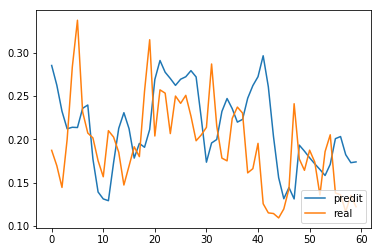

In [23]:
##Mostrem
plt.plot(predis[40], label="predit")
plt.plot(y_daily[n_train+40], label="real")
plt.legend(loc="lower right")
plt.show()

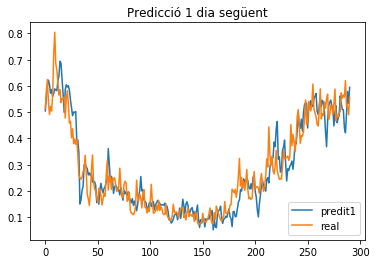

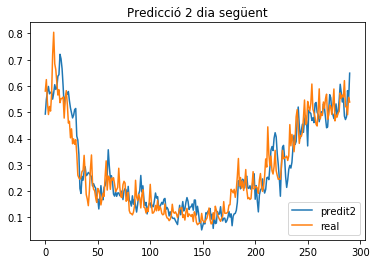

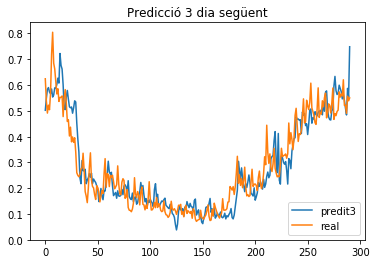

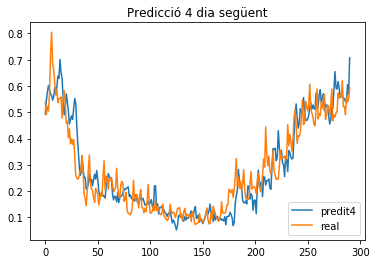

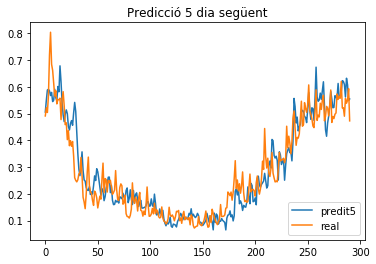

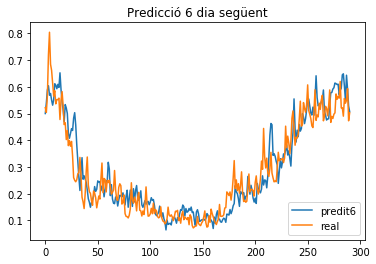

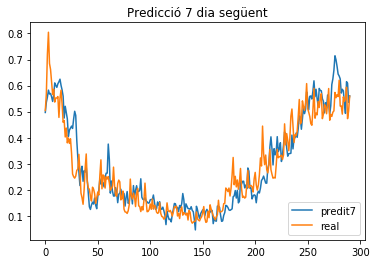

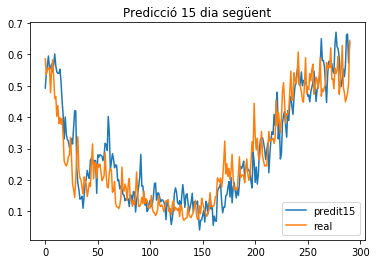

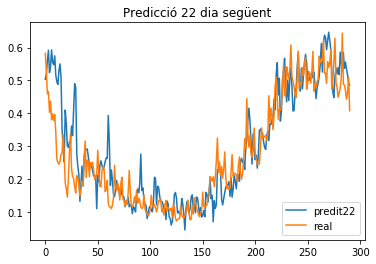

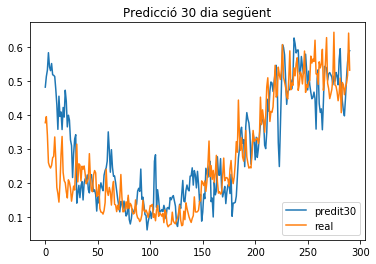

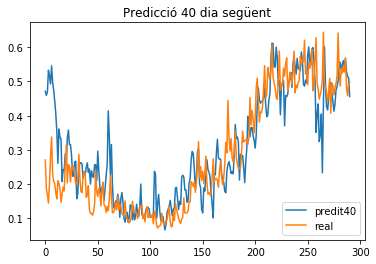

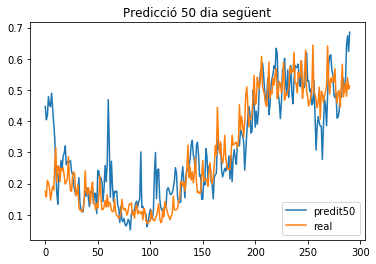

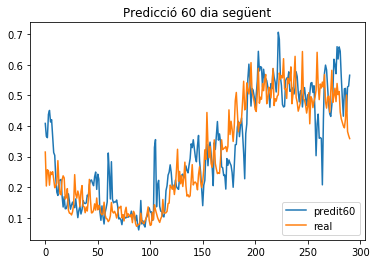

In [24]:
##Mostrem
plt.plot(llista_p0, label="predit1")
plt.plot(y_daily[n_train:lenght,0], label="real")
plt.legend(loc="lower right")
plt.title("Predicció 1 dia següent")
plt.show()

plt.plot(llista_p1, label="predit2")
plt.plot(y_daily[n_train:lenght,1], label="real")
plt.legend(loc="lower right")
plt.title("Predicció 2 dia següent")
plt.show()


plt.plot(llista_p2, label="predit3")
plt.plot(y_daily[n_train:lenght,2], label="real")
plt.legend(loc="lower right")
plt.title("Predicció 3 dia següent")
plt.show()

plt.plot(llista_p3, label="predit4")
plt.plot(y_daily[n_train:lenght,3], label="real")
plt.legend(loc="lower right")
plt.title("Predicció 4 dia següent")
plt.show()

plt.plot(llista_p4, label="predit5")
plt.plot(y_daily[n_train:lenght,4], label="real")
plt.legend(loc="lower right")
plt.title("Predicció 5 dia següent")
plt.show()

plt.plot(llista_p5, label="predit6")
plt.plot(y_daily[n_train:lenght,5], label="real")
plt.legend(loc="lower right")
plt.title("Predicció 6 dia següent")
plt.show()

plt.plot(llista_p6, label="predit7")
plt.plot(y_daily[n_train:lenght,6], label="real")
plt.legend(loc="lower right")
plt.title("Predicció 7 dia següent")
plt.show()

plt.plot(llista_p14, label="predit15")
plt.plot(y_daily[n_train:lenght,14], label="real")
plt.legend(loc="lower right")
plt.title("Predicció 15 dia següent")
plt.show()

plt.plot(llista_p21, label="predit22")
plt.plot(y_daily[n_train:lenght,21], label="real")
plt.legend(loc="lower right")
plt.title("Predicció 22 dia següent")
plt.show()

plt.plot(llista_p29, label="predit30")
plt.plot(y_daily[n_train:lenght,29], label="real")
plt.legend(loc="lower right")
plt.title("Predicció 30 dia següent")
plt.show()

plt.plot(llista_p39, label="predit40")
plt.plot(y_daily[n_train:lenght,39], label="real")
plt.legend(loc="lower right")
plt.title("Predicció 40 dia següent")
plt.show()

plt.plot(llista_p49, label="predit50")
plt.plot(y_daily[n_train:lenght,49], label="real")
plt.legend(loc="lower right")
plt.title("Predicció 50 dia següent")
plt.show()

plt.plot(llista_p59, label="predit60")
plt.plot(y_daily[n_train:lenght,59], label="real")
plt.legend(loc="lower right")
plt.title("Predicció 60 dia següent")
plt.show()